# Pandas

In [167]:
import pandas as pd
import geopandas as gpd
import numpy as np
import json
import matplotlib.pyplot as plt
import locale
import shapely

## Lecture des données
- https://www.data.gouv.fr/fr/datasets/communes-et-villes-de-france-en-csv-excel-json-parquet-et-feather/
- https://villedereve.fr/open-data-donnees-libres-sur-les-communes

### fonctions read_xyz
CSV, Excel, SQL, XML, JSON, ...

In [2]:
dtype = {
    'code_insee': str, 
    'nom_standard': str, 'nom_sans_pronom': str, 'nom_a': str, 'nom_de': str, 'nom_sans_accent': str, 'nom_standard_majuscule': str, 
    'typecom': str, 'typecom_texte': str, 
    'reg_code': str, 'reg_nom': str, 
    'dep_code': str, 'dep_nom': str, 
    'canton_code': str, 'canton_nom': str, 'epci_code': str, 'epci_nom': str, 
    'code_postal': str, 'codes_postaux': str, 
    'academie_code': str, 'academie_nom': str, 'zone_emploi': str, 'code_insee_centre_zone_emploi': str, 
    'code_unite_urbaine': str,
    'population': int, 
    'superficie_hectare': float, 'superficie_km2': float, 
    'densite': float, 'altitude_moyenne': float, 
    'altitude_minimale': float, 'altitude_maximale': float, 
    'latitude_mairie': float, 'longitude_mairie': float, 'latitude_centre': float, 'latitude_centre': float, 
    'grille_densite': str, 
    'gentile': str, 
    'url_wikipedia': str, 'url_villedereve': str
}

df_cities = pd.read_csv(
    'data/communes_france_2025.csv', 
    sep=',', 
    encoding='UTF-8',
    dtype=dtype,
    index_col=0
)
df_cities.head(3)

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
0,01001,L'Abergement-Clémenciat,Abergement-Clémenciat,à Abergement-Clémenciat,de l'Abergement-Clémenciat,l-abergement-clemenciat,L'ABERGEMENT-CLÉMENCIAT,COM,commune,84,...,4.921,46.153,4.926,6,Rural à habitat dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01001-l-abergemen...
1,01002,L'Abergement-de-Varey,Abergement-de-Varey,à Abergement-de-Varey,de l'Abergement-de-Varey,l-abergement-de-varey,L'ABERGEMENT-DE-VAREY,COM,commune,84,...,5.423,46.009,5.428,6,Rural à habitat dispersé,0.0,communes non pôle,"Abergementais, Abergementaises",https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01002-l-abergemen...
2,01004,Ambérieu-en-Bugey,Ambérieu-en-Bugey,à Ambérieu-en-Bugey,d'Ambérieu-en-Bugey,amberieu-en-bugey,AMBÉRIEU-EN-BUGEY,COM,commune,84,...,5.360,45.961,5.373,2,Centres urbains intermédiaires,3.0,centres structurants d'équipements et de services,"Ambarrois, Ambarroises",https://fr.wikipedia.org/wiki/fr:Ambérieu-en-B...,https://villedereve.fr/ville/01004-amberieu-en...


In [3]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34935 entries, 0 to 34934
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   code_insee                         34935 non-null  object 
 1   nom_standard                       34935 non-null  object 
 2   nom_sans_pronom                    34935 non-null  object 
 3   nom_a                              34935 non-null  object 
 4   nom_de                             34935 non-null  object 
 5   nom_sans_accent                    34935 non-null  object 
 6   nom_standard_majuscule             34935 non-null  object 
 7   typecom                            34935 non-null  object 
 8   typecom_texte                      34935 non-null  object 
 9   reg_code                           34935 non-null  object 
 10  reg_nom                            34935 non-null  object 
 11  dep_code                           34935 non-null  object 


In [4]:
df_cities.describe()

,taille_unite_urbaine,population,superficie_hectare,superficie_km2,densite,altitude_moyenne,altitude_minimale,altitude_maximale,latitude_mairie,longitude_mairie,latitude_centre,longitude_centre,niveau_equipements_services
count,34932.000000,3.493500e+04,3.493500e+04,34935.000000,34932.000000,34935.000000,34935.000000,34935.000000,34935.000000,34935.000000,34926.000000,34926.000000,34803.000000
mean,0.799582,1.936405e+03,1.763584e+03,17.633519,169.279056,279.172606,188.710405,384.897782,46.787217,2.714014,46.786757,2.714199,0.447145
std,1.884986,1.498968e+04,1.481510e+04,148.150222,752.070774,288.589425,201.561722,452.958268,3.586378,4.410897,3.588029,4.411771,0.767822
min,0.000000,0.000000e+00,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-21.379000,-61.794000,-21.340000,-61.780000,0.000000
25%,0.000000,1.970000e+02,6.490000e+02,6.000000,18.000000,105.000000,55.000000,132.000000,45.070000,0.793500,45.069000,0.793000,0.000000
50%,0.000000,4.570000e+02,1.088000e+03,11.000000,41.000000,189.000000,134.000000,231.000000,47.351000,2.718000,47.353000,2.718000,0.000000
75%,0.000000,1.164000e+03,1.867000e+03,19.000000,100.000000,337.000000,252.000000,436.500000,48.824000,4.915500,48.823000,4.918000,1.000000
max,8.000000,2.133111e+06,1.871833e+06,18718.000000,28220.000000,2713.000000,9589.000000,4808.000000,51.071000,55.793000,51.073000,55.754000,4.000000


### constructor DataFrame
can handle a lot of 2D objects (ndarray, list of list, list of dict, ....)

In [39]:
df = pd.DataFrame(
    [
        {
            'a': 1,
            'b': 'Toulouse',
        },
        {
            'a': 2,
            'b': 'Nice',
        },
    ]
)
df

,a,b
0,1,Toulouse
1,2,Nice


In [41]:
df2 = pd.DataFrame(
    [
        [1, 'Toulouse'],
        [2, 'Nice'],
    ],
    columns=['a', 'b']
)
df2

,a,b
0,1,Toulouse
1,2,Nice


## Traitements

### colonnes

In [5]:
# 1 seule colonne => Series
df_cities.code_unite_urbaine

0        01000
1        01000
2        01303
3        01000
4        01000
         ...  
34930    9F204
34931    9F301
34932    9F401
34933    9F303
34934    9F304
Name: code_unite_urbaine, Length: 34935, dtype: object

In [6]:
df_cities['code_unite_urbaine']

0        01000
1        01000
2        01303
3        01000
4        01000
         ...  
34930    9F204
34931    9F301
34932    9F401
34933    9F303
34934    9F304
Name: code_unite_urbaine, Length: 34935, dtype: object

In [7]:
df_cities[['nom_standard', 'population']]

,nom_standard,population
0,L'Abergement-Clémenciat,832
1,L'Abergement-de-Varey,267
2,Ambérieu-en-Bugey,14854
3,Ambérieux-en-Dombes,1897
4,Ambléon,113
...,...,...
34930,M'Tsangamouji,6432
34931,Ouangani,10203
34932,Pamandzi,11442
34933,Sada,11156


In [8]:
df_cities.columns

Index(['code_insee', 'nom_standard', 'nom_sans_pronom', 'nom_a', 'nom_de',
       'nom_sans_accent', 'nom_standard_majuscule', 'typecom', 'typecom_texte',
       'reg_code', 'reg_nom', 'dep_code', 'dep_nom', 'canton_code',
       'canton_nom', 'epci_code', 'epci_nom', 'academie_code', 'academie_nom',
       'code_postal', 'codes_postaux', 'zone_emploi',
       'code_insee_centre_zone_emploi', 'code_unite_urbaine',
       'nom_unite_urbaine', 'taille_unite_urbaine',
       'type_commune_unite_urbaine', 'statut_commune_unite_urbaine',
       'population', 'superficie_hectare', 'superficie_km2', 'densite',
       'altitude_moyenne', 'altitude_minimale', 'altitude_maximale',
       'latitude_mairie', 'longitude_mairie', 'latitude_centre',
       'longitude_centre', 'grille_densite', 'grille_densite_texte',
       'niveau_equipements_services', 'niveau_equipements_services_texte',
       'gentile', 'url_wikipedia', 'url_villedereve'],
      dtype='object')

In [9]:
columns = ['nom_standard', 'dep_code', 'population']
df_cities[columns]

,nom_standard,dep_code,population
0,L'Abergement-Clémenciat,01,832
1,L'Abergement-de-Varey,01,267
2,Ambérieu-en-Bugey,01,14854
3,Ambérieux-en-Dombes,01,1897
4,Ambléon,01,113
...,...,...,...
34930,M'Tsangamouji,976,6432
34931,Ouangani,976,10203
34932,Pamandzi,976,11442
34933,Sada,976,11156


### rows (+ colums)

### localizer iloc
sélection en fonction des numéros de lignes, colonnes

voir aussi .head() et .tail()

In [189]:
df_cities.iloc[:3, :5]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de
0,01001,L'Abergement-Clémenciat,Abergement-Clémenciat,à Abergement-Clémenciat,de l'Abergement-Clémenciat
1,01002,L'Abergement-de-Varey,Abergement-de-Varey,à Abergement-de-Varey,de l'Abergement-de-Varey
2,01004,Ambérieu-en-Bugey,Ambérieu-en-Bugey,à Ambérieu-en-Bugey,d'Ambérieu-en-Bugey


In [190]:
df_cities.iloc[-3:, [0, 1, 12]]

,code_insee,nom_standard,dep_nom
34932,97615,Pamandzi,Mayotte
34933,97616,Sada,Mayotte
34934,97617,Tsingoni,Mayotte


### localizer .loc
sélection sur les valeurs (index de ligne ou masques, noms colonnes)

In [10]:
# 1 row => Series
row = df_cities.loc[3]
row

code_insee                                                                       01005
nom_standard                                                       Ambérieux-en-Dombes
nom_sans_pronom                                                    Ambérieux-en-Dombes
nom_a                                                            à Ambérieux-en-Dombes
nom_de                                                           d'Ambérieux-en-Dombes
nom_sans_accent                                                    amberieux-en-dombes
nom_standard_majuscule                                             AMBÉRIEUX-EN-DOMBES
typecom                                                                            COM
typecom_texte                                                                  commune
reg_code                                                                            84
reg_nom                                                           Auvergne-Rhône-Alpes
dep_code                                   

In [11]:
row.nom_standard, row['population']

('Ambérieux-en-Dombes', np.int64(1897))

In [12]:
# liste de lignes
df_cities.loc[[3, 7, 123]]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
3,01005,Ambérieux-en-Dombes,Ambérieux-en-Dombes,à Ambérieux-en-Dombes,d'Ambérieux-en-Dombes,amberieux-en-dombes,AMBÉRIEUX-EN-DOMBES,COM,commune,84,...,4.903,45.996,4.912,5,Bourgs ruraux,1.0,centres locaux d'équipements et de services,Ambarrois,https://fr.wikipedia.org/wiki/fr:Ambérieux-en-...,https://villedereve.fr/ville/01005-amberieux-e...
7,01009,Andert-et-Condon,Andert-et-Condon,à Andert-et-Condon,d'Andert-et-Condon,andert-et-condon,ANDERT-ET-CONDON,COM,commune,84,...,5.656,45.787,5.658,6,Rural à habitat dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:Andert-et-Condon,https://villedereve.fr/ville/01009-andert-et-c...
123,01142,Dagneux,Dagneux,à Dagneux,de Dagneux,dagneux,DAGNEUX,COM,commune,84,...,5.075,45.853,5.073,2,Centres urbains intermédiaires,2.0,centres intermédiaires d'équipements et de ser...,Dagnards,https://fr.wikipedia.org/wiki/fr:Dagneux,https://villedereve.fr/ville/01142-dagneux


In [13]:
df_cities.loc[10:15]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
10,01012,Aranc,Aranc,à Aranc,d'Aranc,aranc,ARANC,COM,commune,84,...,5.508,46.002,5.511,6,Rural à habitat dispersé,0.0,communes non pôle,Randaoillards,https://fr.wikipedia.org/wiki/fr:Aranc,https://villedereve.fr/ville/01012-aranc
11,01013,Arandas,Arandas,à Arandas,d'Arandas,arandas,ARANDAS,COM,commune,84,...,5.486,45.891,5.499,7,Rural à habitat très dispersé,0.0,communes non pôle,Carcaillons,https://fr.wikipedia.org/wiki/fr:Arandas,https://villedereve.fr/ville/01013-arandas
12,01014,Arbent,Arbent,à Arbent,d'Arbent,arbent,ARBENT,COM,commune,84,...,5.682,46.284,5.691,4,Ceintures urbaines,2.0,centres intermédiaires d'équipements et de ser...,Arbanais,https://fr.wikipedia.org/wiki/fr:Arbent,https://villedereve.fr/ville/01014-arbent
13,01015,Arboys en Bugey,Arboys en Bugey,à Arboys en Bugey,d'Arboys en Bugey,arboys-en-bugey,ARBOYS EN BUGEY,COM,commune,84,...,5.650,45.724,5.653,6,Rural à habitat dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:Arboys-en-Bugey,https://villedereve.fr/ville/01015-arboys-en-b...
14,01016,Arbigny,Arbigny,à Arbigny,d'Arbigny,arbigny,ARBIGNY,COM,commune,84,...,4.971,46.478,4.960,6,Rural à habitat dispersé,0.0,communes non pôle,Arbignerons,https://fr.wikipedia.org/wiki/fr:Arbigny,https://villedereve.fr/ville/01016-arbigny
15,01017,Argis,Argis,à Argis,d'Argis,argis,ARGIS,COM,commune,84,...,5.490,45.934,5.482,6,Rural à habitat dispersé,0.0,communes non pôle,Argissiens,https://fr.wikipedia.org/wiki/fr:Argis,https://villedereve.fr/ville/01017-argis


In [14]:
df_cities.loc[
    # rows:
    [3, 5, 7], 
    # columns:
    ["nom_standard", "population", "dep_code"]
]

,nom_standard,population,dep_code
3,Ambérieux-en-Dombes,1897,01
5,Ambronay,2833,01
7,Andert-et-Condon,322,01


In [15]:
df_cities.loc[df_cities.dep_code == '06']

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
1867,06001,Aiglun,Aiglun,à Aiglun,d'Aiglun,aiglun,AIGLUN,COM,commune,93,...,6.915,43.852,6.935,7,Rural à habitat très dispersé,0.0,communes non pôle,Aiglenois,https://fr.wikipedia.org/wiki/fr:Aiglun (Alpes...,https://villedereve.fr/ville/06001-aiglun
1868,06002,Amirat,Amirat,à Amirat,d'Amirat,amirat,AMIRAT,COM,commune,93,...,6.826,43.896,6.813,7,Rural à habitat très dispersé,0.0,communes non pôle,Amiratois,https://fr.wikipedia.org/wiki/fr:Amirat,https://villedereve.fr/ville/06002-amirat
1869,06003,Andon,Andon,à Andon,d'Andon,andon,ANDON,COM,commune,93,...,6.786,43.777,6.823,6,Rural à habitat dispersé,1.0,centres locaux d'équipements et de services,Andonnais-Thorencois,https://fr.wikipedia.org/wiki/fr:Andon (Alpes-...,https://villedereve.fr/ville/06003-andon
1870,06004,Antibes,Antibes,à Antibes,d'Antibes,antibes,ANTIBES,COM,commune,93,...,7.128,43.588,7.106,1,Grands centres urbains,3.0,centres structurants d'équipements et de services,Antibois,https://fr.wikipedia.org/wiki/fr:Antibes,https://villedereve.fr/ville/06004-antibes
1871,06005,Ascros,Ascros,à Ascros,d'Ascros,ascros,ASCROS,COM,commune,93,...,7.014,43.919,7.016,7,Rural à habitat très dispersé,0.0,communes non pôle,Ascrossois,https://fr.wikipedia.org/wiki/fr:Ascros,https://villedereve.fr/ville/06005-ascros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,06159,Villefranche-sur-Mer,Villefranche-sur-Mer,à Villefranche-sur-Mer,de Villefranche-sur-Mer,villefranche-sur-mer,VILLEFRANCHE-SUR-MER,COM,commune,93,...,7.311,43.712,7.322,1,Grands centres urbains,2.0,centres intermédiaires d'équipements et de ser...,Villefranchois,https://fr.wikipedia.org/wiki/fr:Villefranche-...,https://villedereve.fr/ville/06159-villefranch...
2026,06160,Villeneuve-d'Entraunes,Villeneuve-d'Entraunes,à Villeneuve-d'Entraunes,de Villeneuve-d'Entraunes,villeneuve-d-entraunes,VILLENEUVE-D'ENTRAUNES,COM,commune,93,...,6.796,44.122,6.782,7,Rural à habitat très dispersé,0.0,communes non pôle,Villeneuvois,https://fr.wikipedia.org/wiki/fr:Villeneuve-d'...,https://villedereve.fr/ville/06160-villeneuve-...
2027,06161,Villeneuve-Loubet,Villeneuve-Loubet,à Villeneuve-Loubet,de Villeneuve-Loubet,villeneuve-loubet,VILLENEUVE-LOUBET,COM,commune,93,...,7.122,43.649,7.107,1,Grands centres urbains,2.0,centres intermédiaires d'équipements et de ser...,Villeneuvois,https://fr.wikipedia.org/wiki/fr:Villeneuve-Lo...,https://villedereve.fr/ville/06161-villeneuve-...
2028,06162,La Brigue,Brigue,à Brigue,de la Brigue,la-brigue,LA BRIGUE,COM,commune,93,...,7.614,44.072,7.652,6,Rural à habitat dispersé,1.0,centres locaux d'équipements et de services,Brigasque,https://fr.wikipedia.org/wiki/fr:La Brigue,https://villedereve.fr/ville/06162-la-brigue


In [16]:
mask = df_cities.dep_code == '06'
mask

0        False
1        False
2        False
3        False
4        False
         ...  
34930    False
34931    False
34932    False
34933    False
34934    False
Name: dep_code, Length: 34935, dtype: bool

In [17]:
columns = ["nom_standard", "population", "dep_code", "dep_nom"]
df_cities.loc[mask, columns]    

,nom_standard,population,dep_code,dep_nom
1867,Aiglun,93,06,Alpes-Maritimes
1868,Amirat,51,06,Alpes-Maritimes
1869,Andon,640,06,Alpes-Maritimes
1870,Antibes,75130,06,Alpes-Maritimes
1871,Ascros,178,06,Alpes-Maritimes
...,...,...,...,...
2025,Villefranche-sur-Mer,4989,06,Alpes-Maritimes
2026,Villeneuve-d'Entraunes,93,06,Alpes-Maritimes
2027,Villeneuve-Loubet,16779,06,Alpes-Maritimes
2028,La Brigue,719,06,Alpes-Maritimes


In [18]:
# villes de plus de 100_000 habitants
df_cities100k = df_cities.loc[df_cities.population >= 100_000] \
        .sort_values(['population', 'nom_standard'], ascending=[False, True])
df_cities100k[columns]

,nom_standard,population,dep_code,dep_nom
29244,Paris,2133111,75,Paris
4342,Marseille,873076,13,Bouches-du-Rhône
27082,Lyon,522250,69,Rhône
11793,Toulouse,504078,31,Haute-Garonne
1954,Nice,348085,06,Alpes-Maritimes
16293,Nantes,323204,44,Loire-Atlantique
12999,Montpellier,302454,34,Hérault
26530,Strasbourg,291313,67,Bas-Rhin
12354,Bordeaux,261804,33,Gironde
22122,Lille,236710,59,Nord


#### mask avec plusieurs conditions
utiliser les operateurs bitwise (elementwise): `| (or), & (and), ~ (not), ^ (xor)`

In [19]:
dep = '31'
population_threshold = 10_000
df_cities.loc[
    (df_cities.dep_code == dep)
    & (df_cities.population >= population_threshold)
]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
11277,31033,Auterive,Auterive,à Auterive,d'Auterive,auterive,AUTERIVE,COM,commune,76,...,1.478,43.360,1.477,3,Petites villes,2.0,centres intermédiaires d'équipements et de ser...,Auterivains,https://fr.wikipedia.org/wiki/fr:Auterive (Hau...,https://villedereve.fr/ville/31033-auterive
11288,31044,Balma,Balma,à Balma,de Balma,balma,BALMA,COM,commune,76,...,1.500,43.612,1.505,1,Grands centres urbains,3.0,centres structurants d'équipements et de services,Balmanais,https://fr.wikipedia.org/wiki/fr:Balma,https://villedereve.fr/ville/31044-balma
11313,31069,Blagnac,Blagnac,à Blagnac,de Blagnac,blagnac,BLAGNAC,COM,commune,76,...,1.398,43.642,1.379,1,Grands centres urbains,3.0,centres structurants d'équipements et de services,Blagnacais ou Caouec,https://fr.wikipedia.org/wiki/fr:Blagnac,https://villedereve.fr/ville/31069-blagnac
11357,31113,Castanet-Tolosan,Castanet-Tolosan,à Castanet-Tolosan,de Castanet-Tolosan,castanet-tolosan,CASTANET-TOLOSAN,COM,commune,76,...,1.499,43.514,1.504,2,Centres urbains intermédiaires,3.0,centres structurants d'équipements et de services,Castanéens,https://fr.wikipedia.org/wiki/fr:Castanet-Tolosan,https://villedereve.fr/ville/31113-castanet-to...
11360,31116,Castelginest,Castelginest,à Castelginest,de Castelginest,castelginest,CASTELGINEST,COM,commune,76,...,1.427,43.697,1.436,1,Grands centres urbains,2.0,centres intermédiaires d'équipements et de ser...,Castelginestois,https://fr.wikipedia.org/wiki/fr:Castelginest,https://villedereve.fr/ville/31116-castelginest
11393,31149,Colomiers,Colomiers,à Colomiers,de Colomiers,colomiers,COLOMIERS,COM,commune,76,...,1.335,43.612,1.327,1,Grands centres urbains,3.0,centres structurants d'équipements et de services,Columérins ou Columérines,https://fr.wikipedia.org/wiki/fr:Colomiers,https://villedereve.fr/ville/31149-colomiers
11400,31157,Cugnaux,Cugnaux,à Cugnaux,de Cugnaux,cugnaux,CUGNAUX,COM,commune,76,...,1.345,43.545,1.343,1,Grands centres urbains,3.0,centres structurants d'équipements et de services,Cugnalais,https://fr.wikipedia.org/wiki/fr:Cugnaux,https://villedereve.fr/ville/31157-cugnaux
11430,31187,Fonsorbes,Fonsorbes,à Fonsorbes,de Fonsorbes,fonsorbes,FONSORBES,COM,commune,76,...,1.231,43.532,1.239,2,Centres urbains intermédiaires,2.0,centres intermédiaires d'équipements et de ser...,Fonsorbais,https://fr.wikipedia.org/wiki/fr:Fonsorbes,https://villedereve.fr/ville/31187-fonsorbes
11634,31395,Muret,Muret,à Muret,de Muret,muret,MURET,COM,commune,76,...,1.331,43.449,1.308,2,Centres urbains intermédiaires,3.0,centres structurants d'équipements et de services,"Muretains, Muretaines",https://fr.wikipedia.org/wiki/fr:Muret (Haute-...,https://villedereve.fr/ville/31395-muret
11663,31424,Plaisance-du-Touch,Plaisance-du-Touch,à Plaisance-du-Touch,de Plaisance-du-Touch,plaisance-du-touch,PLAISANCE-DU-TOUCH,COM,commune,76,...,1.294,43.558,1.286,1,Grands centres urbains,2.0,centres intermédiaires d'équipements et de ser...,Plaisançois,https://fr.wikipedia.org/wiki/fr:Plaisance-du-...,https://villedereve.fr/ville/31424-plaisance-d...


#### valeurs nulles
None, Nan, NaT

In [20]:
df_cities.loc[df_cities.latitude_centre.isna()]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
4342,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,5.370,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille
20117,55138,Culey,Culey,à Culey,de Culey,culey,CULEY,COM,commune,44,...,5.267,NaN,NaN,6,Rural à habitat dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:Culey,https://villedereve.fr/ville/55138-culey
23101,60694,Les Hauts-Talican,Hauts-Talican,aux Hauts-Talican,des Hauts-Talican,les-hauts-talican,LES HAUTS-TALICAN,COM,commune,32,...,2.004,NaN,NaN,6,Rural à habitat dispersé,NaN,NaN,NaN,NaN,https://villedereve.fr/ville/60694-les-hauts-t...
27082,69123,Lyon,Lyon,à Lyon,de Lyon,lyon,LYON,COM,commune,84,...,4.836,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Lyonnais, Lyonnaise",https://fr.wikipedia.org/wiki/fr:Lyon,https://villedereve.fr/ville/69123-lyon
29244,75056,Paris,Paris,à Paris,de Paris,paris,PARIS,COM,commune,11,...,2.352,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Parisien,https://fr.wikipedia.org/wiki/fr:Paris,https://villedereve.fr/ville/75056-paris
29328,76095,Bihorel,Bihorel,à Bihorel,de Bihorel,bihorel,BIHOREL,COM,commune,28,...,1.116,NaN,NaN,1,Grands centres urbains,2.0,centres intermédiaires d'équipements et de ser...,Bihorellais,https://fr.wikipedia.org/wiki/fr:Bihorel,https://villedereve.fr/ville/76095-bihorel
29810,76601,Saint-Lucien,Saint-Lucien,à Saint-Lucien,de Saint-Lucien,saint-lucien,SAINT-LUCIEN,COM,commune,28,...,1.448,NaN,NaN,6,Rural à habitat dispersé,0.0,communes non pôle,Lucanois,https://fr.wikipedia.org/wiki/fr:Saint-Lucien ...,https://villedereve.fr/ville/76601-saint-lucien
32700,85165,L'Oie,Oie,à Oie,de l'Oie,l-oie,L'OIE,COM,commune,52,...,-1.130,NaN,NaN,5,Bourgs ruraux,NaN,NaN,NaN,NaN,https://villedereve.fr/ville/85165-l-oie
32739,85212,Sainte-Florence,Sainte-Florence,à Sainte-Florence,de Sainte-Florence,sainte-florence,SAINTE-FLORENCE,COM,commune,52,...,-1.152,NaN,NaN,5,Bourgs ruraux,NaN,NaN,NaN,NaN,https://villedereve.fr/ville/85212-sainte-flor...


#### operator in

In [62]:
# rappel python
print(1 in [1, 2, 3])
print('ou' in 'Toulouse') # str: contains
print('nom' in {'nom': 'Toulouse', 'pop': 500_00})

True
True
True


In [65]:
departements = ['06', '31', '64']
df_cities063164 = df_cities.loc[
    df_cities.dep_code.isin(departements),
    columns
]
df_cities063164

,nom_standard,population,dep_code,dep_nom
1867,Aiglun,93,06,Alpes-Maritimes
1868,Amirat,51,06,Alpes-Maritimes
1869,Andon,640,06,Alpes-Maritimes
1870,Antibes,75130,06,Alpes-Maritimes
1871,Ascros,178,06,Alpes-Maritimes
...,...,...,...,...
25389,Vielleségure,387,64,Pyrénées-Atlantiques
25390,Vignes,449,64,Pyrénées-Atlantiques
25391,Villefranque,2893,64,Pyrénées-Atlantiques
25392,Viodos-Abense-de-Bas,748,64,Pyrénées-Atlantiques


In [68]:
df_cities063164.dep_code.unique()

array(['06', '31', '64'], dtype=object)

### bridge .str
accès aux méthodes de la classe `str` et aux fonctions du module `re` sur toute une colonne

In [69]:
df_cities100k.nom_standard.str.upper()

29244                   PARIS
4342                MARSEILLE
27082                    LYON
11793                TOULOUSE
1954                     NICE
16293                  NANTES
12999             MONTPELLIER
26530              STRASBOURG
12354                BORDEAUX
22122                   LILLE
13389                  RENNES
32391                  TOULON
18549                   REIMS
15823           SAINT-ÉTIENNE
29567                LE HAVRE
6795                    DIJON
14177                GRENOBLE
17513                  ANGERS
27202            VILLEURBANNE
34904             SAINT-DENIS
11079                   NÎMES
4288          AIX-EN-PROVENCE
24494        CLERMONT-FERRAND
28502                 LE MANS
10275                   BREST
13993                   TOURS
30993                  AMIENS
28974                  ANNECY
33161                 LIMOGES
21184                    METZ
34504    BOULOGNE-BILLANCOURT
25993               PERPIGNAN
8425                 BESANÇON
16619     

In [74]:
df_cities.loc[df_cities.nom_sans_pronom.str.startswith('Toul'), columns]

,nom_standard,population,dep_code,dep_nom
1103,Toulis-et-Attencourt,113,02,Aisne
1472,Toulon-sur-Allier,1157,03,Allier
2338,Toulaud,1714,07,Ardèche
2767,Touligny,83,08,Ardennes
4265,Toulonjac,749,12,Aveyron
7861,Toulx-Sainte-Croix,251,23,Creuse
11793,Toulouse,504078,31,Haute-Garonne
12805,Toulenne,2813,33,Gironde
14978,Toulouse-le-Château,213,39,Jura
15331,Toulouzette,316,40,Landes


In [77]:
df_cities.loc[df_cities.nom_sans_pronom.str.contains('nice', case=False), columns]

,nom_standard,population,dep_code,dep_nom
1954,Nice,348085,06,Alpes-Maritimes
7015,Nicey,107,21,Côte-d'Or
20326,Nicey-sur-Aire,128,55,Meuse


In [80]:
df_cities.loc[df_cities.nom_sans_pronom.str.contains(r'(ou.*){3,}', case=False), columns] \
    .sort_values('nom_standard')

C:\Users\matth\AppData\Local\Temp\ipykernel_60788\2885791422.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_cities.loc[df_cities.nom_sans_pronom.str.contains(r'(ou.*){3,}', case=False), columns] \


,nom_standard,population,dep_code,dep_nom
494,Bourguignon-sous-Coucy,104,02,Aisne
31183,Courcelles-sous-Moyencourt,152,80,Somme
18882,Doulaincourt-Saucourt,775,52,Haute-Marne
5006,Jou-sous-Monjou,101,15,Cantal
1338,Louroux-Bourbonnais,204,03,Allier
1340,Louroux-de-Bouble,229,03,Allier
22855,Moulin-sous-Touvent,191,60,Oise
25708,Moumoulous,44,65,Hautes-Pyrénées
6178,Ourouer-les-Bourdelins,608,18,Cher
28094,Ouroux-sous-le-Bois-Sainte-Marie,64,71,Saône-et-Loire


### voir aussi  .dt pour les données temporelles
- df.date_sortie.dt.year
- df.horodatage.dt.date()

### Méthodes statistiques

In [81]:
df_cities.population.sum()

np.int64(67648309)

In [83]:
df_cities.groupby('dep_code').population.sum() # resultat => Series

dep_code
01     663202
02     527468
03     334872
04     166077
05     140976
        ...  
971    384315
972    360749
973    286618
974    871157
976    256518
Name: population, Length: 101, dtype: int64

In [88]:
df_cities.groupby('dep_code')['population'].sum()

dep_code
01     663202
02     527468
03     334872
04     166077
05     140976
        ...  
971    384315
972    360749
973    286618
974    871157
976    256518
Name: population, Length: 101, dtype: int64

In [89]:
pop_area_by_dept = df_cities.groupby('dep_code')[['population', 'superficie_km2']].sum()
pop_area_by_dept

,population,superficie_km2
dep_code,,
01,663202,5400.0
02,527468,7311.0
03,334872,7290.0
04,166077,6905.0
05,140976,5274.0
...,...,...
971,384315,1635.0
972,360749,1110.0
973,286618,83824.0


In [87]:
# utiliser l'index
pop_area_by_dept.loc['06']

population        1103941.0
superficie_km2       4295.0
Name: 06, dtype: float64

In [93]:
stats = df_cities.groupby('dep_code').agg({
    'population': ['min', 'max', 'sum', 'mean', 'std'],
    'superficie_km2': ['sum'],
    'nom_standard': ['first', 'last', 'count']
})
stats

population                                              \
                min     max     sum          mean           std   
dep_code                                                          
01               26   41525  663202   1691.841837   3107.927164   
02               16   52958  527468    660.987469   2512.686634   
03               38   33342  334872   1056.378549   2889.708337   
04                5   22926  166077    838.772727   2243.994916   
05                8   40500  140976    870.222222   3319.155584   
...             ...     ...     ...           ...           ...   
971             917   52118  384315  12009.843750  11072.120204   
972             531   74921  360749  10610.264706  13869.959300   
973             241   63468  286618  13028.090909  17228.016117   
974            5074  154765  871157  36298.208333  37610.019827   
976            5192   71437  256518  15089.294118  15881.248848   

         superficie_km2             nom_standard                         
                    sum                    first             last count  
dep_code                                                                 
01               5400.0  L'Abergement-Clémenciat           Vonnas   392  
02               7311.0                Abbécourt    Wissignicourt   798  
03               7290.0                   Abrest           Yzeure   317  
04               6905.0                   Aiglun             Volx   198  
05               5274.0          Abriès-Ristolas        Vitrolles   162  
...                 ...                      ...              ...   ...  
971              1635.0               Les Abymes  Vieux-Habitants    32  
972              1110.0        L'Ajoupa-Bouillon    Bellefontaine    34  
973             83824.0                   Régina       Papaichton    22  
974              2501.0              Les Avirons           Cilaos    24  
976               366.0                    Acoua         Tsingoni    17  

[101 rows x 9 columns]

In [95]:
stats.loc[
    # rows
    :, 
    # columns
    'population'
]

,min,max,sum,mean,std
dep_code,,,,,
01,26,41525,663202,1691.841837,3107.927164
02,16,52958,527468,660.987469,2512.686634
03,38,33342,334872,1056.378549,2889.708337
04,5,22926,166077,838.772727,2243.994916
05,8,40500,140976,870.222222,3319.155584
...,...,...,...,...,...
971,917,52118,384315,12009.843750,11072.120204
972,531,74921,360749,10610.264706,13869.959300
973,241,63468,286618,13028.090909,17228.016117


In [97]:
stats.loc[
    # rows
    '01':'06', 
    # columns
    ('population', 'sum')
]

dep_code
01     663202
02     527468
03     334872
04     166077
05     140976
06    1103941
Name: (population, sum), dtype: int64

In [99]:
extract = stats.loc[
    # rows
    '01':'06', 
    # columns
    ('population', ['sum', 'mean'])
]
extract

population             
                sum         mean
dep_code                        
01           663202  1691.841837
02           527468   660.987469
03           334872  1056.378549
04           166077   838.772727
05           140976   870.222222
06          1103941  6772.644172

<Axes: title={'center': 'population moyenne'}, xlabel='dep_code'>

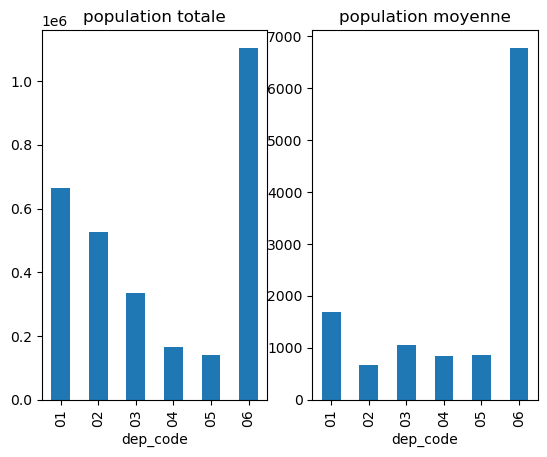

In [107]:
fig, (ax1, ax2) = plt.subplots(1,2)
extract[('population','sum')].plot(kind='bar', ax=ax1, title='population totale')
extract[('population','mean')].plot(kind='bar', ax=ax2, title='population moyenne')

NB: pandas utilise toujours les stats nan-insensitive par défaut. Avec NumPy, on a le choix: 

In [109]:
np.mean([1.5, 4.5, np.nan])

np.float64(nan)

In [110]:
np.nanmean([1.5, 4.5, np.nan])

np.float64(3.0)

## Indexation

In [113]:
df_cities_dept = df_cities.set_index('dep_code')
df_cities_dept

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
dep_code,,,,,,,,,,,,,,,,,,,,,
01,01001,L'Abergement-Clémenciat,Abergement-Clémenciat,à Abergement-Clémenciat,de l'Abergement-Clémenciat,l-abergement-clemenciat,L'ABERGEMENT-CLÉMENCIAT,COM,commune,84,...,4.921,46.153,4.926,6,Rural à habitat dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01001-l-abergemen...
01,01002,L'Abergement-de-Varey,Abergement-de-Varey,à Abergement-de-Varey,de l'Abergement-de-Varey,l-abergement-de-varey,L'ABERGEMENT-DE-VAREY,COM,commune,84,...,5.423,46.009,5.428,6,Rural à habitat dispersé,0.0,communes non pôle,"Abergementais, Abergementaises",https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01002-l-abergemen...
01,01004,Ambérieu-en-Bugey,Ambérieu-en-Bugey,à Ambérieu-en-Bugey,d'Ambérieu-en-Bugey,amberieu-en-bugey,AMBÉRIEU-EN-BUGEY,COM,commune,84,...,5.360,45.961,5.373,2,Centres urbains intermédiaires,3.0,centres structurants d'équipements et de services,"Ambarrois, Ambarroises",https://fr.wikipedia.org/wiki/fr:Ambérieu-en-B...,https://villedereve.fr/ville/01004-amberieu-en...
01,01005,Ambérieux-en-Dombes,Ambérieux-en-Dombes,à Ambérieux-en-Dombes,d'Ambérieux-en-Dombes,amberieux-en-dombes,AMBÉRIEUX-EN-DOMBES,COM,commune,84,...,4.903,45.996,4.912,5,Bourgs ruraux,1.0,centres locaux d'équipements et de services,Ambarrois,https://fr.wikipedia.org/wiki/fr:Ambérieux-en-...,https://villedereve.fr/ville/01005-amberieux-e...
01,01006,Ambléon,Ambléon,à Ambléon,d'Ambléon,ambleon,AMBLÉON,COM,commune,84,...,5.601,45.750,5.594,6,Rural à habitat dispersé,0.0,communes non pôle,Ambléonais,https://fr.wikipedia.org/wiki/fr:Ambléon,https://villedereve.fr/ville/01006-ambleon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,97613,M'Tsangamouji,M'Tsangamouji,à M'Tsangamouji,de M'Tsangamouji,m-tsangamouji,M'TSANGAMOUJI,COM,commune,6,...,45.084,-12.751,45.087,3,Petites villes,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/fr:M'Tsangamouji,https://villedereve.fr/ville/97613-m-tsangamouji
976,97614,Ouangani,Ouangani,à Ouangani,d'Ouangani,ouangani,OUANGANI,COM,commune,6,...,45.139,-12.837,45.138,3,Petites villes,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/fr:Ouangani,https://villedereve.fr/ville/97614-ouangani
976,97615,Pamandzi,Pamandzi,à Pamandzi,de Pamandzi,pamandzi,PAMANDZI,COM,commune,6,...,45.275,-12.796,45.284,2,Centres urbains intermédiaires,NaN,NaN,Pamandziens,https://fr.wikipedia.org/wiki/fr:Pamandzi,https://villedereve.fr/ville/97615-pamandzi


In [119]:
df_cities_dept.columns

Index(['code_insee', 'nom_standard', 'nom_sans_pronom', 'nom_a', 'nom_de',
       'nom_sans_accent', 'nom_standard_majuscule', 'typecom', 'typecom_texte',
       'reg_code', 'reg_nom', 'dep_nom', 'canton_code', 'canton_nom',
       'epci_code', 'epci_nom', 'academie_code', 'academie_nom', 'code_postal',
       'codes_postaux', 'zone_emploi', 'code_insee_centre_zone_emploi',
       'code_unite_urbaine', 'nom_unite_urbaine', 'taille_unite_urbaine',
       'type_commune_unite_urbaine', 'statut_commune_unite_urbaine',
       'population', 'superficie_hectare', 'superficie_km2', 'densite',
       'altitude_moyenne', 'altitude_minimale', 'altitude_maximale',
       'latitude_mairie', 'longitude_mairie', 'latitude_centre',
       'longitude_centre', 'grille_densite', 'grille_densite_texte',
       'niveau_equipements_services', 'niveau_equipements_services_texte',
       'gentile', 'url_wikipedia', 'url_villedereve'],
      dtype='object')

In [117]:
df_cities_dept.loc['06', ['nom_standard', 'nom_sans_pronom', 'population']]

,nom_standard,nom_sans_pronom,population
dep_code,,,
06,Aiglun,Aiglun,93
06,Amirat,Amirat,51
06,Andon,Andon,640
06,Antibes,Antibes,75130
06,Ascros,Ascros,178
...,...,...,...
06,Villefranche-sur-Mer,Villefranche-sur-Mer,4989
06,Villeneuve-d'Entraunes,Villeneuve-d'Entraunes,93
06,Villeneuve-Loubet,Villeneuve-Loubet,16779


In [123]:
extract063164 = df_cities_dept.loc[
    ['06','31','64'], 
    ['nom_standard', 'nom_sans_pronom', 'population']
].sort_values('nom_sans_pronom')
extract063164

,nom_standard,nom_sans_pronom,population
dep_code,,,
64,Aast,Aast,189
64,Abidos,Abidos,209
64,Abitain,Abitain,109
64,Abos,Abos,529
64,Abère,Abère,162
...,...,...,...
31,Villeneuve-lès-Bouloc,Villeneuve-lès-Bouloc,1663
31,Villenouvelle,Villenouvelle,1454
64,Viodos-Abense-de-Bas,Viodos-Abense-de-Bas,748


In [121]:
# keep index column in columns
df_cities.set_index('dep_code', drop=False) \
    .loc[['06','31','64'], columns]

,nom_standard,population,dep_code,dep_nom
dep_code,,,,
06,Aiglun,93,06,Alpes-Maritimes
06,Amirat,51,06,Alpes-Maritimes
06,Andon,640,06,Alpes-Maritimes
06,Antibes,75130,06,Alpes-Maritimes
06,Ascros,178,06,Alpes-Maritimes
...,...,...,...,...
64,Vielleségure,387,64,Pyrénées-Atlantiques
64,Vignes,449,64,Pyrénées-Atlantiques
64,Villefranque,2893,64,Pyrénées-Atlantiques


### Tri suivant une langue et un pays

In [124]:
extract063164.sort_values?

Signature:
extract063164.sort_values(
    by: 'IndexLabel',
    *,
    axis: 'Axis' = 0,
    ascending: 'bool | list[bool] | tuple[bool, ...]' = True,
    inplace: 'bool' = False,
    kind: 'SortKind' = 'quicksort',
    na_position: 'str' = 'last',
    ignore_index: 'bool' = False,
    key: 'ValueKeyFunc | None' = None,
) -> 'DataFrame | None'
Docstring:
Sort by the values along either axis.

Parameters
----------
by : str or list of str
    Name or list of names to sort by.

    - if `axis` is 0 or `'index'` then `by` may contain index
      levels and/or column labels.
    - if `axis` is 1 or `'columns'` then `by` may contain column
      levels and/or index labels.
axis : "{0 or 'index', 1 or 'columns'}", default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the length of
     the by.
inplace : bool, default False
     If True, perform op

In [125]:
words_fr = ['été', 'étuve', 'étage', 'Arbre', 'Zèbre', 'garçon', 'gare', 'garage', 'cœur', 'cobra', 'corde']
sorted(words_fr)

['Arbre',
 'Zèbre',
 'cobra',
 'corde',
 'cœur',
 'garage',
 'gare',
 'garçon',
 'étage',
 'étuve',
 'été']

In [130]:
locale.getlocale(category=locale.LC_COLLATE)

(None, None)

In [131]:
locale.getlocale(category=locale.LC_MONETARY)

(None, None)

In [132]:
locale.getlocale(category=locale.LC_NUMERIC)

(None, None)

In [137]:
locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8')
locale.getlocale(category=locale.LC_COLLATE)

('fr_FR', 'UTF-8')

In [138]:
sorted(words_fr, key=locale.strxfrm)

['Arbre',
 'cobra',
 'cœur',
 'corde',
 'étage',
 'été',
 'étuve',
 'garage',
 'garçon',
 'gare',
 'Zèbre']

In [140]:
locale.strxfrm('Zèbre')

'\x0e©\x0e!\x0e\t\x0e\x8a\x0e!\x01\x02\x02\x02\x0f\x01\x12\x01\x01'

In [141]:
extract063164.sort_values('nom_sans_pronom',  key=lambda col: col.apply(locale.strxfrm))

,nom_standard,nom_sans_pronom,population
dep_code,,,
64,Aast,Aast,189
64,Abère,Abère,162
64,Abidos,Abidos,209
64,Abitain,Abitain,109
64,Abos,Abos,529
...,...,...,...
06,Villeneuve-Loubet,Villeneuve-Loubet,16779
31,Villeneuve-Tolosane,Villeneuve-Tolosane,10369
31,Villenouvelle,Villenouvelle,1454


### apply

In [146]:
import math
df_cities100k.population.apply(lambda p: math.sqrt(abs(p**2 + 1 - p**3)))

29244    3.115445e+09
4342     8.157890e+08
27082    3.774133e+08
11793    3.578872e+08
1954     2.053654e+08
16293    1.837445e+08
12999    1.663368e+08
26530    1.572313e+08
12354    1.339564e+08
22122    1.151659e+08
13389    1.067843e+08
32391    7.665515e+07
18549    7.597309e+07
15823    7.178028e+07
29567    6.766879e+07
6795     6.360780e+07
14177    6.249199e+07
17513    6.231231e+07
27202    6.216548e+07
34904    6.088464e+07
11079    5.699657e+07
4288     5.663558e+07
24494    5.654862e+07
28502    5.521645e+07
10275    5.216933e+07
13993    5.107409e+07
30993    4.884611e+07
28974    4.780257e+07
33161    4.674225e+07
21184    4.202402e+07
34504    4.146932e+07
25993    4.139043e+07
8425     4.115301e+07
16619    3.982364e+07
29750    3.853270e+07
34567    3.846129e+07
34555    3.720895e+07
4491     3.559089e+07
34628    3.510894e+07
26815    3.467760e+07
34908    3.414045e+07
19796    3.366468e+07
Name: population, dtype: float64

In [147]:
def nomrmalize_name(name):
    return name.upper()[:8]

In [148]:
df_cities100k.nom_sans_pronom.apply(nomrmalize_name)

29244       PARIS
4342     MARSEILL
27082        LYON
11793    TOULOUSE
1954         NICE
16293      NANTES
12999    MONTPELL
26530    STRASBOU
12354    BORDEAUX
22122       LILLE
13389      RENNES
32391      TOULON
18549       REIMS
15823    SAINT-ÉT
29567       HAVRE
6795        DIJON
14177    GRENOBLE
17513      ANGERS
27202    VILLEURB
34904    SAINT-DE
11079       NÎMES
4288     AIX-EN-P
24494    CLERMONT
28502        MANS
10275       BREST
13993       TOURS
30993      AMIENS
28974      ANNECY
33161     LIMOGES
21184        METZ
34504    BOULOGNE
25993    PERPIGNA
8425     BESANÇON
16619     ORLÉANS
29750       ROUEN
34567    SAINT-DE
34555    MONTREUI
4491         CAEN
34628    ARGENTEU
26815    MULHOUSE
34908    SAINT-PA
19796       NANCY
Name: nom_sans_pronom, dtype: object

In [149]:
def nomrmalize_name_limit(name, limit):
    return name.upper()[:limit]

In [154]:
df_cities100k.nom_sans_pronom.apply(nomrmalize_name_limit, args=(10,))

29244         PARIS
4342      MARSEILLE
27082          LYON
11793      TOULOUSE
1954           NICE
16293        NANTES
12999    MONTPELLIE
26530    STRASBOURG
12354      BORDEAUX
22122         LILLE
13389        RENNES
32391        TOULON
18549         REIMS
15823    SAINT-ÉTIE
29567         HAVRE
6795          DIJON
14177      GRENOBLE
17513        ANGERS
27202    VILLEURBAN
34904    SAINT-DENI
11079         NÎMES
4288     AIX-EN-PRO
24494    CLERMONT-F
28502          MANS
10275         BREST
13993         TOURS
30993        AMIENS
28974        ANNECY
33161       LIMOGES
21184          METZ
34504    BOULOGNE-B
25993     PERPIGNAN
8425       BESANÇON
16619       ORLÉANS
29750         ROUEN
34567    SAINT-DENI
34555     MONTREUIL
4491           CAEN
34628    ARGENTEUIL
26815      MULHOUSE
34908    SAINT-PAUL
19796         NANCY
Name: nom_sans_pronom, dtype: object

In [155]:
df_cities100k.nom_sans_pronom.apply(nomrmalize_name_limit, limit=3)

29244    PAR
4342     MAR
27082    LYO
11793    TOU
1954     NIC
16293    NAN
12999    MON
26530    STR
12354    BOR
22122    LIL
13389    REN
32391    TOU
18549    REI
15823    SAI
29567    HAV
6795     DIJ
14177    GRE
17513    ANG
27202    VIL
34904    SAI
11079    NÎM
4288     AIX
24494    CLE
28502    MAN
10275    BRE
13993    TOU
30993    AMI
28974    ANN
33161    LIM
21184    MET
34504    BOU
25993    PER
8425     BES
16619    ORL
29750    ROU
34567    SAI
34555    MON
4491     CAE
34628    ARG
26815    MUL
34908    SAI
19796    NAN
Name: nom_sans_pronom, dtype: object

In [158]:
df_cities100k.apply(
    lambda row: f"{row.dep_code}#{row.nom_sans_pronom.upper()}",
    axis=1
)

29244                   75#PARIS
4342                13#MARSEILLE
27082                    69#LYON
11793                31#TOULOUSE
1954                     06#NICE
16293                  44#NANTES
12999             34#MONTPELLIER
26530              67#STRASBOURG
12354                33#BORDEAUX
22122                   59#LILLE
13389                  35#RENNES
32391                  83#TOULON
18549                   51#REIMS
15823           42#SAINT-ÉTIENNE
29567                   76#HAVRE
6795                    21#DIJON
14177                38#GRENOBLE
17513                  49#ANGERS
27202            69#VILLEURBANNE
34904            974#SAINT-DENIS
11079                   30#NÎMES
4288          13#AIX-EN-PROVENCE
24494        63#CLERMONT-FERRAND
28502                    72#MANS
10275                   29#BREST
13993                   37#TOURS
30993                  80#AMIENS
28974                  74#ANNECY
33161                 87#LIMOGES
21184                    57#METZ
34504    9

In [165]:
df_cities100k_bis = df_cities100k.copy()
df_cities100k_bis[['nom_debut', 'nom_fin']] = df_cities100k_bis.apply(
    lambda row: (row.nom_sans_pronom[:4], row.nom_sans_pronom[4:]),
    axis=1,
    result_type='expand'
)
df_cities100k_bis

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,nom_debut,nom_fin
29244,75056,Paris,Paris,à Paris,de Paris,paris,PARIS,COM,commune,11,...,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Parisien,https://fr.wikipedia.org/wiki/fr:Paris,https://villedereve.fr/ville/75056-paris,Pari,s
4342,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,Mars,eille
27082,69123,Lyon,Lyon,à Lyon,de Lyon,lyon,LYON,COM,commune,84,...,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Lyonnais, Lyonnaise",https://fr.wikipedia.org/wiki/fr:Lyon,https://villedereve.fr/ville/69123-lyon,Lyon,
11793,31555,Toulouse,Toulouse,à Toulouse,de Toulouse,toulouse,TOULOUSE,COM,commune,76,...,1.432,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Toulousains,https://fr.wikipedia.org/wiki/fr:Toulouse,https://villedereve.fr/ville/31555-toulouse,Toul,ouse
1954,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,7.238,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,Nice,
16293,44109,Nantes,Nantes,à Nantes,de Nantes,nantes,NANTES,COM,commune,52,...,-1.548,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Nantais(e),https://fr.wikipedia.org/wiki/fr:Nantes,https://villedereve.fr/ville/44109-nantes,Nant,es
12999,34172,Montpellier,Montpellier,à Montpellier,de Montpellier,montpellier,MONTPELLIER,COM,commune,76,...,3.868,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Montpelliérain, Montpelliéraine",https://fr.wikipedia.org/wiki/fr:Montpellier,https://villedereve.fr/ville/34172-montpellier,Mont,pellier
26530,67482,Strasbourg,Strasbourg,à Strasbourg,de Strasbourg,strasbourg,STRASBOURG,COM,commune,44,...,7.768,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Strasbourgeoises, Strasbourgeois",https://fr.wikipedia.org/wiki/fr:Strasbourg,https://villedereve.fr/ville/67482-strasbourg,Stra,sbourg
12354,33063,Bordeaux,Bordeaux,à Bordeaux,de Bordeaux,bordeaux,BORDEAUX,COM,commune,75,...,-0.574,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Bordelais,https://fr.wikipedia.org/wiki/fr:Bordeaux,https://villedereve.fr/ville/33063-bordeaux,Bord,eaux
22122,59350,Lille,Lille,à Lille,de Lille,lille,LILLE,COM,commune,32,...,3.048,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Lillois, Lilloise",https://fr.wikipedia.org/wiki/fr:Lille,https://villedereve.fr/ville/59350-lille,Lill,e


NB: voir aussi mask, where pour des transformations partielles

## Export Données

### méthode DataFrame.to_xyz
CSV, clipboard, XML, JSON, Excel, SQL, ...

In [23]:
df_cities100k.to_clipboard()

In [25]:
df_cities100k.to_csv('data/cities100k.csv', sep=';', encoding='CP1252', index=False)

In [26]:
df_cities100k.to_csv('data/cities100k.csv.gz', sep=';', encoding='CP1252', index=False, compression='gzip')

In [29]:
df_cities100k.to_json('data/cities100k.json', orient='records')

In [33]:
df_cities100k.to_json('data/cities100k_split.json', orient='split')

### relecture data json (sans pandas)

In [36]:
# relecture
with open('data/cities100k.json', encoding='UTF-8') as f:
    data = json.load(f)
data[:2]

[{'code_insee': '75056',
  'nom_standard': 'Paris',
  'nom_sans_pronom': 'Paris',
  'nom_a': 'à Paris',
  'nom_de': 'de Paris',
  'nom_sans_accent': 'paris',
  'nom_standard_majuscule': 'PARIS',
  'typecom': 'COM',
  'typecom_texte': 'commune',
  'reg_code': '11',
  'reg_nom': 'Île-de-France',
  'dep_code': '75',
  'dep_nom': 'Paris',
  'canton_code': '7599',
  'canton_nom': 'Paris',
  'epci_code': '200054781',
  'epci_nom': 'Métropole du Grand Paris',
  'academie_code': '1',
  'academie_nom': 'Paris',
  'code_postal': '75000',
  'codes_postaux': None,
  'zone_emploi': '01109',
  'code_insee_centre_zone_emploi': '75056',
  'code_unite_urbaine': '00851',
  'nom_unite_urbaine': 'Paris',
  'taille_unite_urbaine': 8.0,
  'type_commune_unite_urbaine': 'UNITE URBAINE',
  'statut_commune_unite_urbaine': 'C',
  'population': 2133111,
  'superficie_hectare': 10540.0,
  'superficie_km2': 105.0,
  'densite': 20238.0,
  'altitude_moyenne': 35.0,
  'altitude_minimale': 28.0,
  'altitude_maximale': 

In [38]:
data[0]['nom_standard']

'Paris'

### Autre export: boucle

In [44]:
# idée: boucle
for i, row in df_cities100k.iterrows():
    print(f"{
        i:02d
    } - {
        row.nom_standard
    } (population={
        row['population']
    })")

29244 - Paris (population=2133111)
4342 - Marseille (population=873076)
27082 - Lyon (population=522250)
11793 - Toulouse (population=504078)
1954 - Nice (population=348085)
16293 - Nantes (population=323204)
12999 - Montpellier (population=302454)
26530 - Strasbourg (population=291313)
12354 - Bordeaux (population=261804)
22122 - Lille (population=236710)
13389 - Rennes (population=225081)
32391 - Toulon (population=180452)
18549 - Reims (population=179380)
15823 - Saint-Étienne (population=172718)
29567 - Le Havre (population=166058)
6795 - Dijon (population=159346)
14177 - Grenoble (population=157477)
17513 - Angers (population=157175)
27202 - Villeurbanne (population=156928)
34904 - Saint-Denis (population=154765)
11079 - Nîmes (population=148104)
4288 - Aix-en-Provence (population=147478)
24494 - Clermont-Ferrand (population=147327)
28502 - Le Mans (population=145004)
10275 - Brest (population=139619)
13993 - Tours (population=137658)
30993 - Amiens (population=133625)
28974 - Ann

In [45]:
with open('data/cities100k_custom.txt', encoding='UTF-8', mode='w') as f:
    for i, row in df_cities100k.iterrows():
        f.write(f"{
            i:02d
        } - {
            row.nom_standard
        } (population={
            row['population']
        })\n")

## Encoding text

In [47]:
char = '€'
for encoding in 'UTF-8', 'CP1252', 'ISO-8859-15':
    code = char.encode(encoding)
    print(encoding, code, sep=' : ')

UTF-8 : b'\xe2\x82\xac'
CP1252 : b'\x80'
ISO-8859-15 : b'\xa4'


In [48]:
code =  b'\xe2\x82\xac'
code.decode('UTF-8')

'€'

In [50]:
# n'importe quoi
code.decode('CP1252')

'â‚¬'

In [55]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 0: invalid continuation byte
# code = b'\xe1\xe6'
# code.decode('UTF-8')

In [57]:
city = '東京'
print(city)
print(city.encode('UTF-8'))

東京
b'\xe6\x9d\xb1\xe4\xba\xac'


In [59]:
print('❤️🦜')

❤️🦜


## Traitement GIS avec GeoPandas

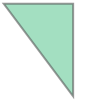

In [170]:
poly =  shapely.Polygon([[1.5, 6.25],[4.5, 6.25],[4.5, 2.25]])
poly

In [172]:
df_cities100k.dep_code.unique()

array(['75', '13', '69', '31', '06', '44', '34', '67', '33', '59', '35',
       '83', '51', '42', '76', '21', '38', '49', '974', '30', '63', '72',
       '29', '37', '80', '74', '87', '57', '92', '66', '25', '45', '93',
       '14', '95', '68', '54'], dtype=object)

In [174]:
df_cities100k_metro = df_cities100k.loc[df_cities100k.dep_code != '974']

In [178]:
geometry = gpd.points_from_xy(df_cities100k_metro.longitude_mairie, df_cities100k_metro.latitude_mairie)
geometry

<GeometryArray>
[ <POINT (2.352 48.857)>,   <POINT (5.37 43.296)>,  <POINT (4.836 45.764)>,
  <POINT (1.444 43.605)>,  <POINT (7.272 43.696)>, <POINT (-1.554 47.218)>,
  <POINT (3.897 43.598)>,  <POINT (7.752 48.573)>, <POINT (-0.579 44.838)>,
   <POINT (3.071 50.63)>,  <POINT (-1.68 48.112)>,   <POINT (5.932 43.12)>,
  <POINT (4.031 49.258)>,   <POINT (4.387 45.44)>,  <POINT (0.108 49.494)>,
  <POINT (5.042 47.322)>,  <POINT (5.736 45.186)>, <POINT (-0.548 47.471)>,
   <POINT (4.88 45.766)>,   <POINT (4.36 43.837)>,   <POINT (5.447 43.53)>,
   <POINT (3.086 45.78)>,  <POINT (0.197 48.008)>, <POINT (-4.485 48.391)>,
   <POINT (0.69 47.391)>,  <POINT (2.296 49.894)>,  <POINT (6.129 45.899)>,
   <POINT (1.26 45.826)>,   <POINT (6.176 49.12)>,  <POINT (2.241 48.836)>,
  <POINT (2.894 42.699)>,  <POINT (6.024 47.238)>,  <POINT (1.909 47.903)>,
    <POINT (1.1 49.444)>,  <POINT (2.358 48.936)>,  <POINT (2.441 48.862)>,
 <POINT (-0.373 49.181)>,  <POINT (2.249 48.948)>,   <POINT (7.336 47.75

In [179]:
gdf_cities100k_metro = gpd.GeoDataFrame(
    df_cities100k_metro,
    geometry=geometry,
    crs="EPSG:4326"
)
gdf_cities100k_metro.head()
    

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry
29244,75056,Paris,Paris,à Paris,de Paris,paris,PARIS,COM,commune,11,...,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Parisien,https://fr.wikipedia.org/wiki/fr:Paris,https://villedereve.fr/ville/75056-paris,POINT (2.352 48.857)
4342,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,POINT (5.37 43.296)
27082,69123,Lyon,Lyon,à Lyon,de Lyon,lyon,LYON,COM,commune,84,...,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Lyonnais, Lyonnaise",https://fr.wikipedia.org/wiki/fr:Lyon,https://villedereve.fr/ville/69123-lyon,POINT (4.836 45.764)
11793,31555,Toulouse,Toulouse,à Toulouse,de Toulouse,toulouse,TOULOUSE,COM,commune,76,...,43.596,1.432,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Toulousains,https://fr.wikipedia.org/wiki/fr:Toulouse,https://villedereve.fr/ville/31555-toulouse,POINT (1.444 43.605)
1954,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,43.712,7.238,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,POINT (7.272 43.696)


In [183]:
# https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html
gdf_cities100k_metro.explore(
    column="population",
    tooltip=["nom_standard", "population", "superficie_km2", "dep_code"], 
    # TODO: choose color scheme, colormap
    marker_kwds=dict(radius=5, fill=True)
)

### localizer GIS: .cx

In [186]:
gdf_cities100k_metro.total_bounds

array([-4.485, 42.699,  7.752, 50.63 ])

In [188]:
gdf_cities100k_metro.cx[:, :44]

,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,reg_code,...,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve,geometry
4342,13055,Marseille,Marseille,à Marseille,de Marseille,marseille,MARSEILLE,COM,commune,93,...,NaN,NaN,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Marseillais,https://fr.wikipedia.org/wiki/fr:Marseille,https://villedereve.fr/ville/13055-marseille,POINT (5.37 43.296)
11793,31555,Toulouse,Toulouse,à Toulouse,de Toulouse,toulouse,TOULOUSE,COM,commune,76,...,43.596,1.432,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Toulousains,https://fr.wikipedia.org/wiki/fr:Toulouse,https://villedereve.fr/ville/31555-toulouse,POINT (1.444 43.605)
1954,06088,Nice,Nice,à Nice,de Nice,nice,NICE,COM,commune,93,...,43.712,7.238,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Niçois,https://fr.wikipedia.org/wiki/fr:Nice,https://villedereve.fr/ville/06088-nice,POINT (7.272 43.696)
12999,34172,Montpellier,Montpellier,à Montpellier,de Montpellier,montpellier,MONTPELLIER,COM,commune,76,...,43.613,3.868,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Montpelliérain, Montpelliéraine",https://fr.wikipedia.org/wiki/fr:Montpellier,https://villedereve.fr/ville/34172-montpellier,POINT (3.897 43.598)
32391,83137,Toulon,Toulon,à Toulon,de Toulon,toulon,TOULON,COM,commune,93,...,43.136,5.932,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Toulonnais,https://fr.wikipedia.org/wiki/fr:Toulon,https://villedereve.fr/ville/83137-toulon,POINT (5.932 43.12)
11079,30189,Nîmes,Nîmes,à Nîmes,de Nîmes,nimes,NÎMES,COM,commune,76,...,43.845,4.348,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Nîmois et Nîmoises,https://fr.wikipedia.org/wiki/fr:Nîmes,https://villedereve.fr/ville/30189-nimes,POINT (4.36 43.837)
4288,13001,Aix-en-Provence,Aix-en-Provence,à Aix-en-Provence,d'Aix-en-Provence,aix-en-provence,AIX-EN-PROVENCE,COM,commune,93,...,43.536,5.399,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,"Aixois(e), Aquisextain(e)s, ou Aquisestain(e)s",https://fr.wikipedia.org/wiki/fr:Aix-en-Provence,https://villedereve.fr/ville/13001-aix-en-prov...,POINT (5.447 43.53)
25993,66136,Perpignan,Perpignan,à Perpignan,de Perpignan,perpignan,PERPIGNAN,COM,commune,76,...,42.697,2.899,1,Grands centres urbains,4.0,centres majeurs d'équipements et de services,Perpignanais,https://fr.wikipedia.org/wiki/fr:Perpignan,https://villedereve.fr/ville/66136-perpignan,POINT (2.894 42.699)
